In [270]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeRegressor as DTR
#import shap


In [404]:
# Replace 'sales.csv' with the exact filename you uploaded
df = pd.read_csv("sales.csv")

In [ ]:
# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "state_holiday", 'date','day_of_week',], inplace=True)

# Handle missing values
df.dropna(inplace=True)


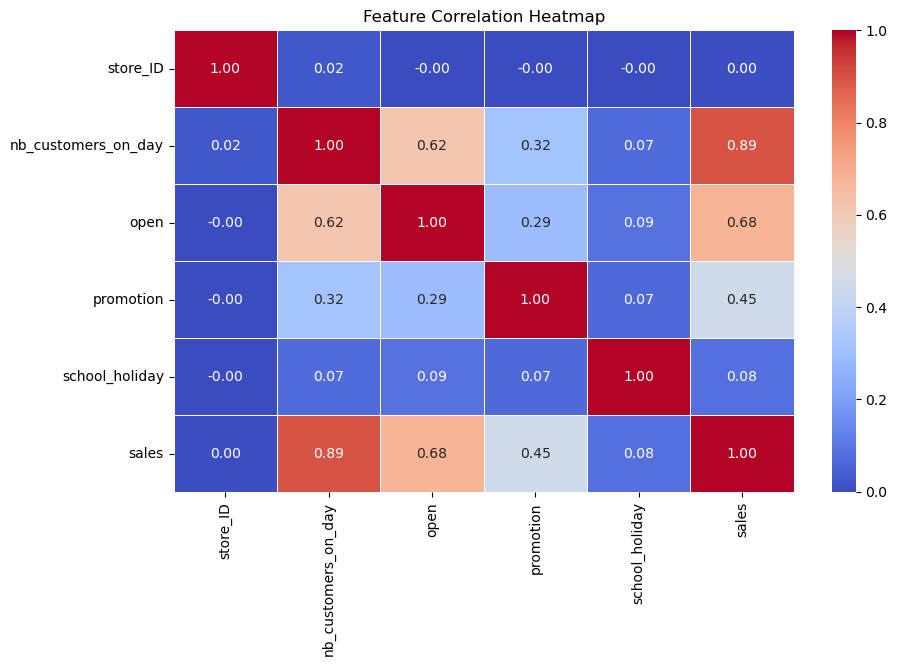

In [406]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [408]:
# Define features (X) and transformed target (y)
X = df.drop(columns=["sales"])
y = df.sales
X.head()

,store_ID,nb_customers_on_day,open,promotion,school_holiday
0,366,517,1,0,0
1,394,694,1,0,0
2,807,970,1,1,0
3,802,473,1,1,0
4,726,1068,1,1,0


In [409]:
# Split Data Into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [410]:
dtr = DTR(max_depth=25, min_samples_split=4, min_samples_leaf=5)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=4)

In [411]:
# Make predictions on the test set
y_pred = dtr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

In [412]:
print(f"R² Score: {r2:.4f}")

R² Score: 0.9563


In [413]:
y_train_pred = dtr.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R² Score: {train_r2:.4f}")

Train R² Score: 0.9706


In [414]:
from sklearn.model_selection import cross_val_score

cv_r2_scores = cross_val_score(dtr, X, y, cv=5, scoring='r2')
print(f"Mean CV R² Score: {cv_r2_scores.mean():.4f}")

Mean CV R² Score: 0.9574


In [415]:
y_train_pred = dtr.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {r2:.4f}")


Train R² Score: 0.9706
Test R² Score: 0.9563


In [416]:
import pandas as pd

# Load the real data
real_data = pd.read_csv("REAl_DATA.csv")
real_data['promo_customers'] = real_data['promotion'] * real_data['nb_customers_on_day']


# Display the first few rows
real_data.head()


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,promo_customers
0,272371,415,7,01/03/2015,0,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0,657
3,77556,683,2,29/01/2013,862,1,0,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0,591


In [419]:
# Ensure the real dataset has only the required columns
required_features = ['store_ID', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday']
real_data = real_data[required_features]

# Check if columns now match
print("Final Columns in Real Data:", real_data.columns)

Final Columns in Real Data: Index(['store_ID', 'nb_customers_on_day', 'open', 'promotion',
       'school_holiday'],
      dtype='object')


In [420]:
real_predictions = dtr.predict(real_data)

# Add predictions to the dataset
real_data["Predicted_Sales"] = real_predictions

# Display results
real_data.head()

,store_ID,nb_customers_on_day,open,promotion,school_holiday,Predicted_Sales
0,415,0,0,0,0,0.000000
1,27,0,0,0,0,0.000000
2,404,657,1,1,0,5435.363636
3,683,862,1,0,0,8139.833333
4,920,591,1,1,0,5838.285714


In [423]:
real_data.to_csv("Predicted_REAl_DATA.csv", index=False)


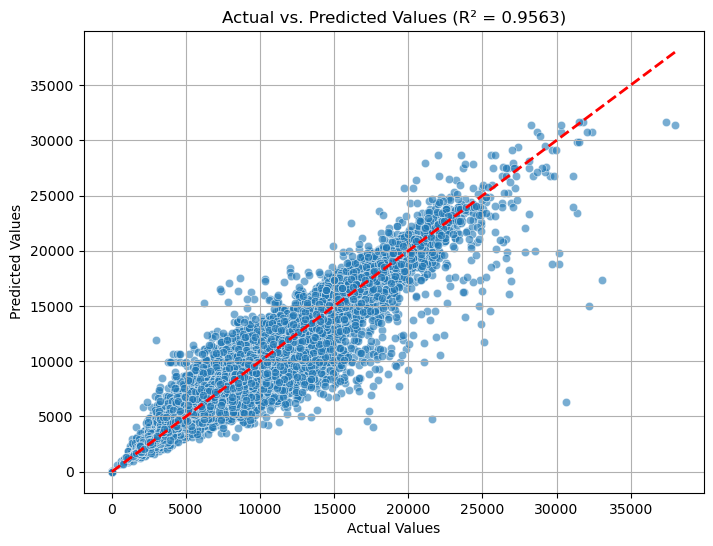

In [424]:
y_pred_linear = dtr.predict(X_test)
# R² Score
r2 = r2_score(y_test, y_pred_linear)
# Scatter Plot of Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values (R² = {r2:.4f})")
plt.grid(True)
plt.show()